In [1]:
import requests
from bs4 import BeautifulSoup
import matplotlib
import matplotlib.pylab as plt
import scipy as sp
%matplotlib inline
import math
import matplotlib.pyplot as plt

In [2]:
r = requests.get("http://www.iwf.net/results/ranking-list/?ranking_year=2015&ranking_agegroup=Senior&ranking_gender=M&ranking_category=all&ranking_lifter=all&x=18&y=10")

In [3]:
r.content

b'<!DOCTYPE html>\r\n<html lang="en-US">\r\n<head>\r\n<meta charset="UTF-8" />\r\n<meta name="viewport" content="width=device-width" />\r\n<title>Ranking list | International Weightlifting Federation</title>\r\n\t\r\n\t\r\n<link rel="stylesheet" type="text/css" media="all" href="http://www.iwf.net/wp-content/themes/iwf/style.css" />\r\n<link rel="pingback" href="http://www.iwf.net/xmlrpc.php" />\r\n<link rel="alternate" type="application/rss+xml" title="International Weightlifting Federation" href="http://www.iwf.net/feed/" />\r\n<script type="text/javascript" src="http://ajax.googleapis.com/ajax/libs/jquery/1.6.3/jquery.min.js"></script>\r\n<script type="text/javascript" src="http://www.iwf.net/wp-content/themes/iwf/misc/iwf.js"></script>\r\n<meta name="SKYPE_TOOLBAR" content="SKYPE_TOOLBAR_PARSER_COMPATIBLE" />\r\n<link rel="stylesheet" type="text/css" media="print" href="http://www.iwf.net/wp-content/themes/iwf/print.css" />\r\n\r\n\t<style type="text/css">\r\n\t\t#fancybox-close{ri

In [4]:
soup = BeautifulSoup(r.content)

In [5]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width" name="viewport"/>
  <title>
   Ranking list | International Weightlifting Federation
  </title>
  <link href="http://www.iwf.net/wp-content/themes/iwf/style.css" media="all" rel="stylesheet" type="text/css"/>
  <link href="http://www.iwf.net/xmlrpc.php" rel="pingback"/>
  <link href="http://www.iwf.net/feed/" rel="alternate" title="International Weightlifting Federation" type="application/rss+xml"/>
  <script src="http://ajax.googleapis.com/ajax/libs/jquery/1.6.3/jquery.min.js" type="text/javascript">
  </script>
  <script src="http://www.iwf.net/wp-content/themes/iwf/misc/iwf.js" type="text/javascript">
  </script>
  <meta content="SKYPE_TOOLBAR_PARSER_COMPATIBLE" name="SKYPE_TOOLBAR"/>
  <link href="http://www.iwf.net/wp-content/themes/iwf/print.css" media="print" rel="stylesheet" type="text/css"/>
  <style type="text/css">
   #fancybox-close{right:-15px;top:-15px}
		div#fancybo

In [6]:
rows = soup.find_all("tr")

In [7]:
#this list will collect the body weight of the lifters
bw = []
for row in rows:
    cells = row.find_all('td')

    

    for i, cell in enumerate(cells):
        if i == 4:
            bw.append(cell.text.strip())
        


In [8]:
len(bw)

1015

In [9]:
#this list will collect the total lifted by the lifters.
total = []
for row in rows:
    cells = row.find_all('td')

    

    for i, cell in enumerate(cells):
        if i == 7:
            total.append(cell.text.strip())
        


In [10]:
len(total)

1015

In [11]:
#A and b are the constants given to calculate the Sinclair coefficient and Sinclair total
A = 0.794358141
b = 174.393
#this lis will collect the Sinclair total of the lifters.
sinclair = []

for i in range(len(total)):
    if float(bw[i]) > b:
        ts = float(total[i])
        sinclair.append(ts)
    
    else:
        s = math.log(float(bw[i])/b, 10)
        ts = float(total[i])*(10**(A*(s**2)))
        sinclair.append(ts)


In [12]:
len(sinclair)

1015

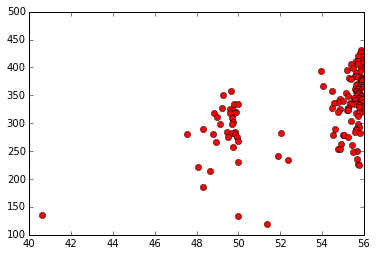

In [13]:
#56kg weight class
plt.plot(bw, sinclair, 'ro')
plt.axis([40, 56, 100, 500])
plt.show()

In [14]:
#how many lifters are in the 56kg weight class
a1 = 0
b1 = 0
for i in range(len(bw)):
    if float(bw[i]) <= 56:
        a1 = a1+1
        
for i in range(len(bw)):
    if float(bw[i]) <= 56 and sinclair[i] >= 400:
        b1 = b1+1        
        
c1 = 100*(b1/a1) 
#a how many total, b  number of people with a sinclair above 400, c percentage.
print(b1,a1,c1)        

12 142 8.450704225352112


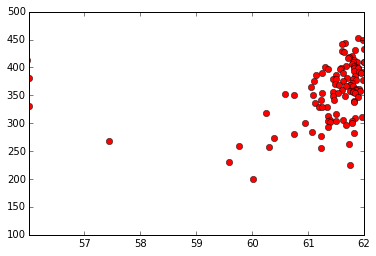

In [15]:
#62kg weight class
plt.plot(bw, sinclair, 'ro')
plt.axis([56.01, 62, 100, 500])
plt.show()

In [16]:
#how many lifters in the 62
a2 = 0
b2 = 0
for i in range(len(bw)):
    if float(bw[i]) <= 62 and float(bw[i]) > 56:
        a2 = a2+1
        
for i in range(len(bw)):
    if float(bw[i]) <= 62 and float(bw[i]) > 56 and sinclair[i] >= 400:
        b2 = b2+1        
        
c2 = 100*(b2/a2) 
#a how many total, b  number of people with a sinclair above 400, c percentage.
print(b2,a2,c2)   

20 106 18.867924528301888


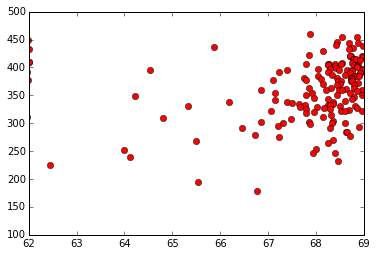

In [17]:
#69
plt.plot(bw, sinclair, 'ro')
plt.axis([62.01, 69, 100, 500])
plt.show()

In [18]:
#how many in 69
a3 = 0
b3 = 0
for i in range(len(bw)):
    if float(bw[i]) <= 69 and float(bw[i]) > 62:
        a3 = a3+1
        
for i in range(len(bw)):
    if float(bw[i]) <= 69 and float(bw[i]) > 62 and sinclair[i] >= 400:
        b3 = b3+1        
        
c3 = 100*(b3/a3) 
#a how many total, b  number of people with a sinclair above 400, c percentage.
print(b3,a3,c3)  

35 153 22.875816993464053


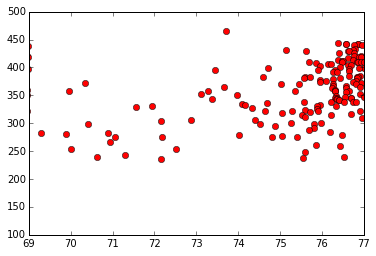

In [19]:
#77
plt.plot(bw, sinclair, 'ro')
plt.axis([69.01, 77, 100, 500])
plt.show()

In [20]:
#how many in 77
a4 = 0
b4 = 0
for i in range(len(bw)):
    if float(bw[i]) <= 77 and float(bw[i]) > 69:
        a4 = a4+1
        
for i in range(len(bw)):
    if float(bw[i]) <= 77 and float(bw[i]) > 69 and sinclair[i] >= 400:
        b4 = b4+1        
        
c4 = 100*(b4/a4) 
#b  number of people with a sinclair above 400, c percentage.
print(b4,a4,c4)  

38 159 23.89937106918239


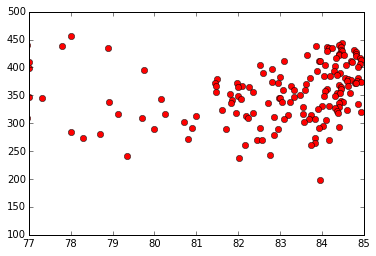

In [21]:
#85
plt.plot(bw, sinclair, 'ro')
plt.axis([77.01, 85, 100, 500])
plt.show()

In [22]:
#how many in 85
a5 = 0
b5 = 0

for i in range(len(bw)):
    if float(bw[i]) <= 85 and float(bw[i]) > 77:
        a5 = a5+1
        
for i in range(len(bw)):
    if float(bw[i]) <= 85 and float(bw[i]) > 77 and sinclair[i] >= 400:
        b5 = b5+1        
        
c5 = 100*(b5/a5) 
#b  number of people with a sinclair above 400, c percentage.
print(b5,a5,c5)  

35 154 22.727272727272727


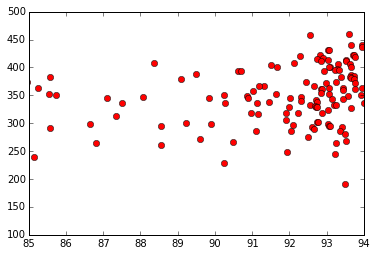

In [23]:
#94
plt.plot(bw, sinclair, 'ro')
plt.axis([85.01, 94, 100, 500])
plt.show()

In [24]:
#how many in 94
a6 = 0
b6 = 0

for i in range(len(bw)):
    if float(bw[i]) <= 94 and float(bw[i]) > 85:
        a6 = a6+1
        
for i in range(len(bw)):
    if float(bw[i]) <= 94 and float(bw[i]) > 85 and sinclair[i] >= 400:
        b6 = b6+1        
        
c6 = 100*(b6/a6) 
#b  number of people with a sinclair above 400, c percentage.
print(b6,a6,c6)  

25 129 19.379844961240313


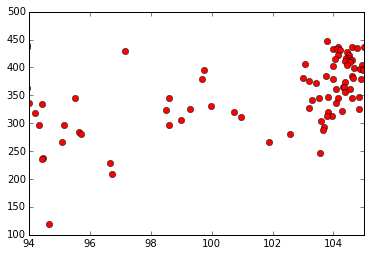

In [25]:
#105
plt.plot(bw, sinclair, 'ro')
plt.axis([94.01, 105, 100, 500])
plt.show()

In [26]:
#how many in 105
a7 = 0
b7 =0

for i in range(len(bw)):
    if float(bw[i]) <= 105 and float(bw[i]) > 94:
        a7 = a7+1
        
for i in range(len(bw)):
    if float(bw[i]) <= 105 and float(bw[i]) > 94 and sinclair[i] >= 400:
        b7 = b7+1        
        
c7 = 100*(b7/a7) 
#a how many total, b  number of people with a sinclair above 400, c percentage.
print(b7,a7,c7)  

23 83 27.710843373493976


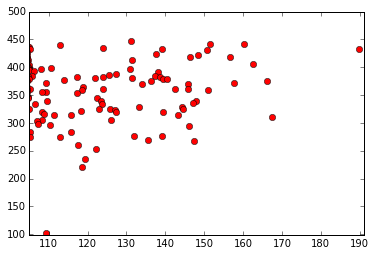

In [32]:
#105 plus
plt.plot(bw, sinclair, 'ro')
plt.axis([105, 191, 99, 500])
plt.show()

In [28]:
#how many in 105 plus
a8 = 0
b8 = 0
for i in range(len(bw)):
    if float(bw[i]) > 105:
        a8 = a8+1
        
for i in range(len(bw)):
    if float(bw[i]) > 105 and sinclair[i] >= 400:
        b8 = b8+1        
        
c8 = 100*(b8/a8) 
#b  number of people with a sinclair above 400, c percentage.
print(b8,a8,c8) 

15 89 16.853932584269664


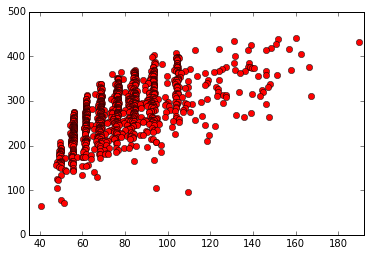

In [29]:
#plot of total based on body weight
plt.plot(bw, total, 'ro')
plt.axis([35, 192, 0, 500])
plt.show()

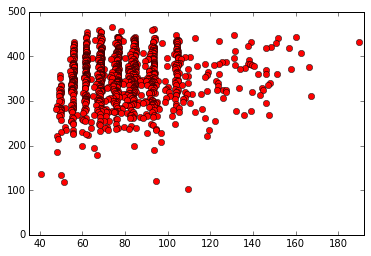

In [30]:
#plot of sinclair total based on body weight
plt.plot(bw, sinclair, 'ro')
plt.axis([35, 192, 0, 500])
plt.show()